# Эксперимент Майкельсона

Данные классического эксперимента Майкельсона по измерению скорости света с помощью вращающегося зеркала, 100 наблюдений:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.utils import shuffle

In [2]:
speed = np.genfromtxt('speed.txt')
speed

array([299850., 299740., 299900., 300070., 299930., 299850., 299950.,
       299980., 299980., 299880., 300000., 299980., 299930., 299650.,
       299760., 299810., 300000., 300000., 299960., 299960., 299960.,
       299940., 299960., 299940., 299880., 299800., 299850., 299880.,
       299900., 299840., 299830., 299790., 299810., 299880., 299880.,
       299830., 299800., 299790., 299760., 299800., 299880., 299880.,
       299880., 299860., 299720., 299720., 299620., 299860., 299970.,
       299950., 299880., 299910., 299850., 299870., 299840., 299840.,
       299850., 299840., 299840., 299840., 299890., 299810., 299810.,
       299820., 299800., 299770., 299760., 299740., 299750., 299760.,
       299910., 299920., 299890., 299860., 299880., 299720., 299840.,
       299850., 299850., 299780., 299890., 299840., 299780., 299810.,
       299760., 299810., 299790., 299810., 299820., 299850., 299870.,
       299870., 299810., 299740., 299810., 299940., 299950., 299800.,
       299810., 2998

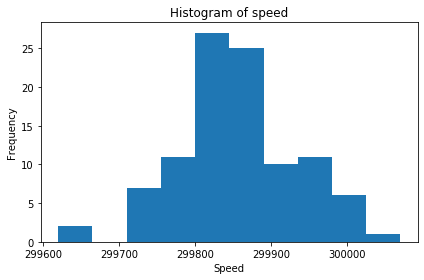

In [3]:
plt.hist(speed)
plt.title('Histogram of speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.tight_layout()

Можно ли считать наблюдения нормально распределёнными?

## Анализ данных

1. Постройте на одном графике оцененную при помощи ядрового метода сглаженную гистограмму (оценку плотности распределения), а также кривую плотности нормального распределения с параметрами, оцененным по выборке. (Вам помогут функции `gaussian_kde` и `norm.pdf`, из `scipy.stats`)

2. Постройте на одном графике эмпирическую функцию распределения (emperical CDF), а также кривую функции распределения нормального распределения (CDF) с параметрами, оцененным по выборке. Добавьте доверительный интервал на график. (Используйте `ECDF` из `statsmodels.api`)

3. Постройте Q-Q plot для данных. Похожи ли данные на нормальное распределение? (Вам поможет функция `qqplot` из `statsmodels`)

# Продолжительность жизни крыс

В исследовании принимало участие 195 крыс. 106 из них держали на строгой диете, оставшиеся 89 — на диете ad libitum. Имеющиеся данные: продолжительность жизни крыс в каждой из групп. Влияет ли диета на продолжительность жизни?

In [4]:
rats = pd.read_table("rats.txt", sep="\t")
shuffle(rats)

,lifespan,diet
33,907,restricted
109,465,ad libitum
143,688,ad libitum
57,1057,restricted
184,799,ad libitum
...,...,...
14,716,restricted
62,1085,restricted
56,1047,restricted
132,660,ad libitum


In [5]:
x1 = rats.loc[rats['diet'] == 'restricted']['lifespan']
x2 = rats.loc[rats['diet'] == 'ad libitum']['lifespan']

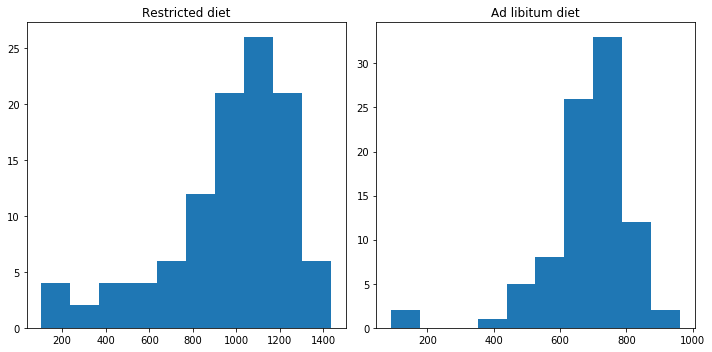

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Restricted diet')
plt.hist(x1)
plt.subplot(1, 2, 2)
plt.title('Ad libitum diet')
plt.hist(x2)
plt.tight_layout()

1. Нарисуйте один график с двумя boxplot на нем (для каждой из диет). Укажите на графике 95% доверительный интервал для каждой из медиан. В этом вам поможет функция boxplot(..., notch=TRUE), которой первым аргументом можно передать объект типа формула.

## Нормальность

2. Проверим нормальность двух выборок (для каждой из диет). Для этого нарисуйте qq-график и отметьте на нем прямую линию, соответствующую идеальным теоретическим квантилям нормального распределения. Похожи ли данные на нормальное распределение?

3. Попробуйте исключить крыс, проживших меньше 400 дней (например, можно предположить, что смерть раньше этого срока вызывается причинами, не связанными с диетой) и снова нарисовать qq-графики. Можно ли применять к этим данным критерии, основанные на предположении о нормальности?

Усечённые выборки можно считать практически нормальными.

## Сравнение средних

Проверьте нулевую гипотезу

$H_0$: продолжительность жизни крыс не меняется при ограничении диеты.

против следующих альтернатив:

$H_1$: крысы на строгой диете живут дольше.

$H_1$: средняя продолжительность жизни крыс меняется при ограничении диеты. 

В этом задании вам поможет функция `ttest_ind`, которая реализует критерий Стьюдента.